# Lab 3: Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing # needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans

#### Load the dataset

In [2]:
df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


### B. Rescale the Data

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering)

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters k

In [5]:
k = 3

#### Run k-Means

In [6]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

In [7]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [8]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

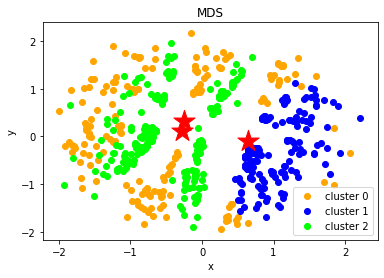

In [9]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [10]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


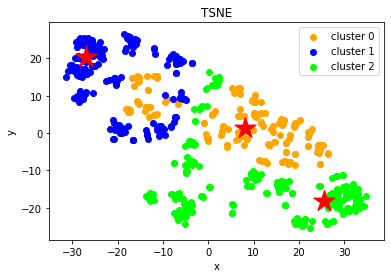

In [11]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

#### E3. Sum of squared distances/ Elbow method

We are supposed to plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k and to use the Elbow method to pick the best value of k. 

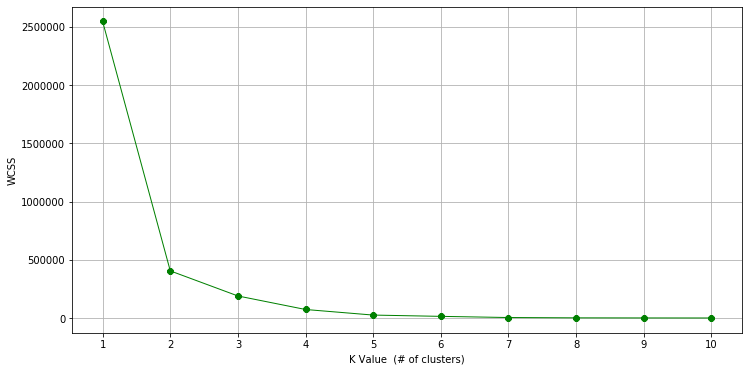

In [12]:
#from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    #Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state = 0)
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=1, c="green", marker ="8")
plt.xlabel("K Value  (# of clusters)")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

After 3 the drop in WCSS seems to be minimal. I will choose 3 as the optimal number of clusters.

### F. Cluster Analysis

In [13]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [14]:
df.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.084523,1.058140,360.0,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,1,0.333333,0.925883,1.047319,360.0,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,0
2,2,0.000000,0.683858,0.635920,360.0,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,2
3,3,0.000000,0.608992,1.002824,360.0,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,2
4,4,0.000000,1.101869,1.115650,360.0,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,2


In [15]:
df.tail()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,609,0.000000,0.666409,0.676143,360.0,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,610,1.000000,0.858916,0.395858,180.0,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,2
611,611,0.333333,1.313719,1.566110,360.0,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,2
612,612,0.666667,1.267616,1.325676,360.0,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,2
613,613,0.000000,0.925883,1.074155,360.0,0.0,0,0,0,0,1,0,0,1,0,0,0.663523,0


In [16]:
df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,305.713483,0.230337,0.897784,1.078417,344.359551,0.539326,0.764045,0.028090,0.556180,0.000000,0.134831,0.044944,0.275281,0.224719,0.387640,0.000000,0.839761
1,301.549223,0.248705,0.927029,1.081748,347.689119,0.979275,0.761658,0.020725,0.699482,0.010363,0.139896,0.046632,0.196891,1.000000,0.000000,0.927461,0.875113
2,311.008230,0.260631,0.922071,1.070226,336.790123,0.987654,0.847737,0.016461,0.674897,0.004115,0.127572,0.061728,0.193416,0.000000,0.547325,1.000000,0.869608


### G. Agglomerative Clustering

In [17]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

In [18]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
data = scaler.fit_transform(df) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(data) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [19]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

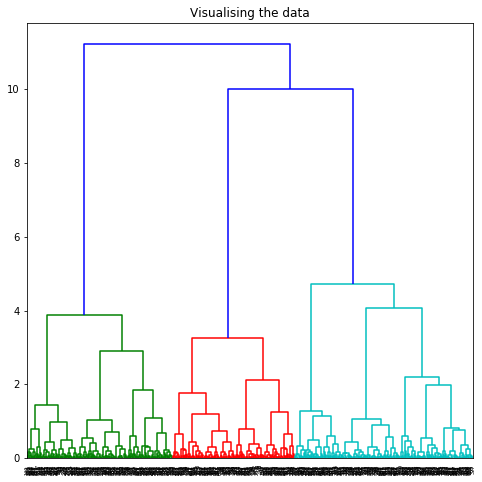

In [20]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

K = 2

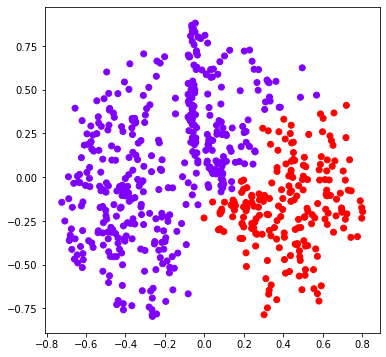

In [21]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

K = 3

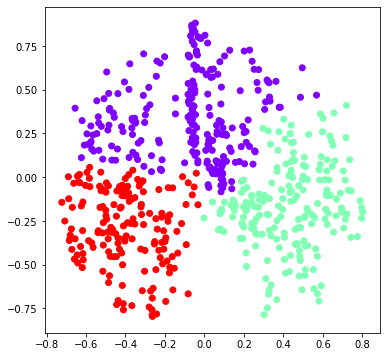

In [22]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

k = 4

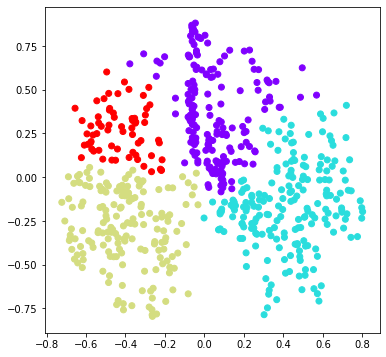

In [23]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

K = 5

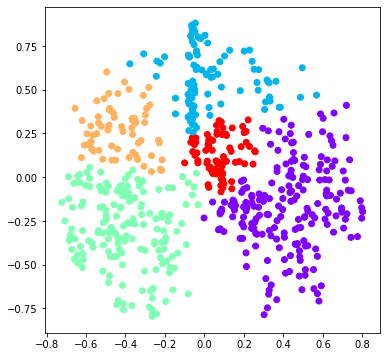

In [24]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

K = 6

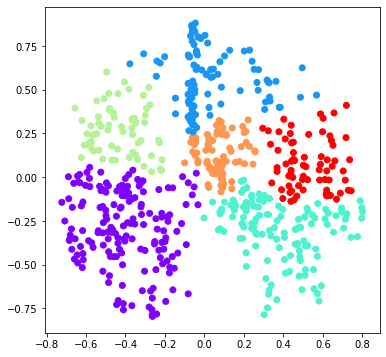

In [25]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

I will now determine the optimal number of clusters using the silhouette scores.

#### Evaluating different numbers of K and visualising the result

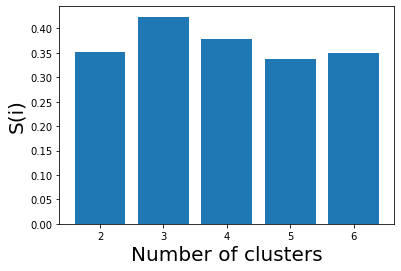

In [26]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

With the help of silhouette scores, the optimal number of clusters for the given data and for the agglomerative clustering is 2 or 6.